In [1]:
import matplotlib
import numpy as np
import pandas as pd
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/finished plan data.xlsx')
df_t = pd.read_excel('data/result of sea trial.xlsx')
connector_color = 'magenta'
lwidth = 5
marker_size = 100

In [3]:
Te1 = df_t['Te1'].mean()
Tc = df_t['Tc'].mean()
Te2 = df_t['Te2'].mean()
Ps = df_t['Ps'].mean()
Pm = df_t['Pm'].mean()
Pc = df_t['Pc'].mean()
Ne = df_t['Ne'].mean()
Nb = df_t['Nb'].mean()
Be = df_t['Be'].mean()
Rc = df_t['Rc'].mean()

In [4]:
matplotlib.rcParams.update({'font.size': 40})

In [5]:
pack = {
    'Te1' : ('m', 0, 'red'),
    'Tc'  : ('m', 0, 'green'),
    'Te2' : ('m', 0, 'dodgerblue'),
    'Ps'  : ('m', 1, 'orange'),
    'Pm'  : ('t', 1, 'darkgreen'),
    'Pc'  : ('t', 1, 'black'),
    'Ne'  : ('m', 2, 'blue'),
    'Nb'  : ('t', 2, 'grey'),
    'Be'  : ('m', 3, 'maroon'),
    'Rc'  : ('t', 3, 'purple')
}

In [6]:
def temp_func():
    
    # ====================================== Frame/ spines visibility
    ax[0].spines.bottom.set_visible(False)
    ax[1].spines.top.set_visible(False)
    ax[1].spines.bottom.set_visible(False)
    ax1t.spines.top.set_visible(False)
    ax1t.spines.bottom.set_visible(False)
    ax[2].spines.top.set_visible(False)
    ax[2].spines.bottom.set_visible(False)
    ax2t.spines.top.set_visible(False)
    ax2t.spines.bottom.set_visible(False)
    ax[3].spines.top.set_visible(False)
    ax3t.spines.top.set_visible(False)
    
    # ======================================= LINE PLOTS
    
    for param, content in pack.items():
        print(param, content)
        if content[0] == 'm' :
            ax[content[1]].plot(df['Engine Output (%)'], 
                               df[param], 
                               label = param, 
                               linewidth = lwidth, 
                               color = content[2])
        elif content[0] == 't' :
            ax_t[content[1]][1].plot(df['Engine Output (%)'],
                                       df[param],
                                       label = param,
                                       linewidth = lwidth,
                                       color = content[2])
    
    # ======================================= Y-AXIS LIMITS
    ax[0].set_ylim([200, 450])
    ax[1].set_ylim([0.05, 0.4])
    ax1t.set_ylim([3, 15])
    ax[2].set_ylim([80, 150])
    ax2t.set_ylim([2000, 14000])
    ax[3].set_ylim([160, 220])
    ax3t.set_ylim([20, 80])
    
    # ======================================= LEGENDS
    ax[0].legend(frameon = False)
    ax[1].legend(loc =(0.02, 0.75), frameon = False)
    ax1t.legend(loc = 'upper left', frameon = False)
    ax[2].legend(loc = (0.02, 0.78), frameon = False)
    ax2t.legend(loc = 'upper left', frameon = False)
    ax[3].legend(loc = (0.02, 0.8), frameon = False)
    ax3t.legend(loc = 'upper left', frameon = False)
    
    # ======================================= Y-AXIS LABELS
    ax[0].set_ylabel('Te1, Tc, Te2')
    ax[1].set_ylabel('Ps')
    ax1t.set_ylabel('Pc, Pm')
    ax[2].set_ylabel('Ne')
    ax2t.set_ylabel('Nb')
    ax[3].set_ylabel('Be')
    ax3t.set_ylabel('Rc')

Te1 ('m', 0, 'red')
Tc ('m', 0, 'green')
Te2 ('m', 0, 'dodgerblue')
Ps ('m', 1, 'orange')
Pm ('t', 1, 'darkgreen')
Pc ('t', 1, 'black')
Ne ('m', 2, 'blue')
Nb ('t', 2, 'grey')
Be ('m', 3, 'maroon')
Rc ('t', 3, 'purple')


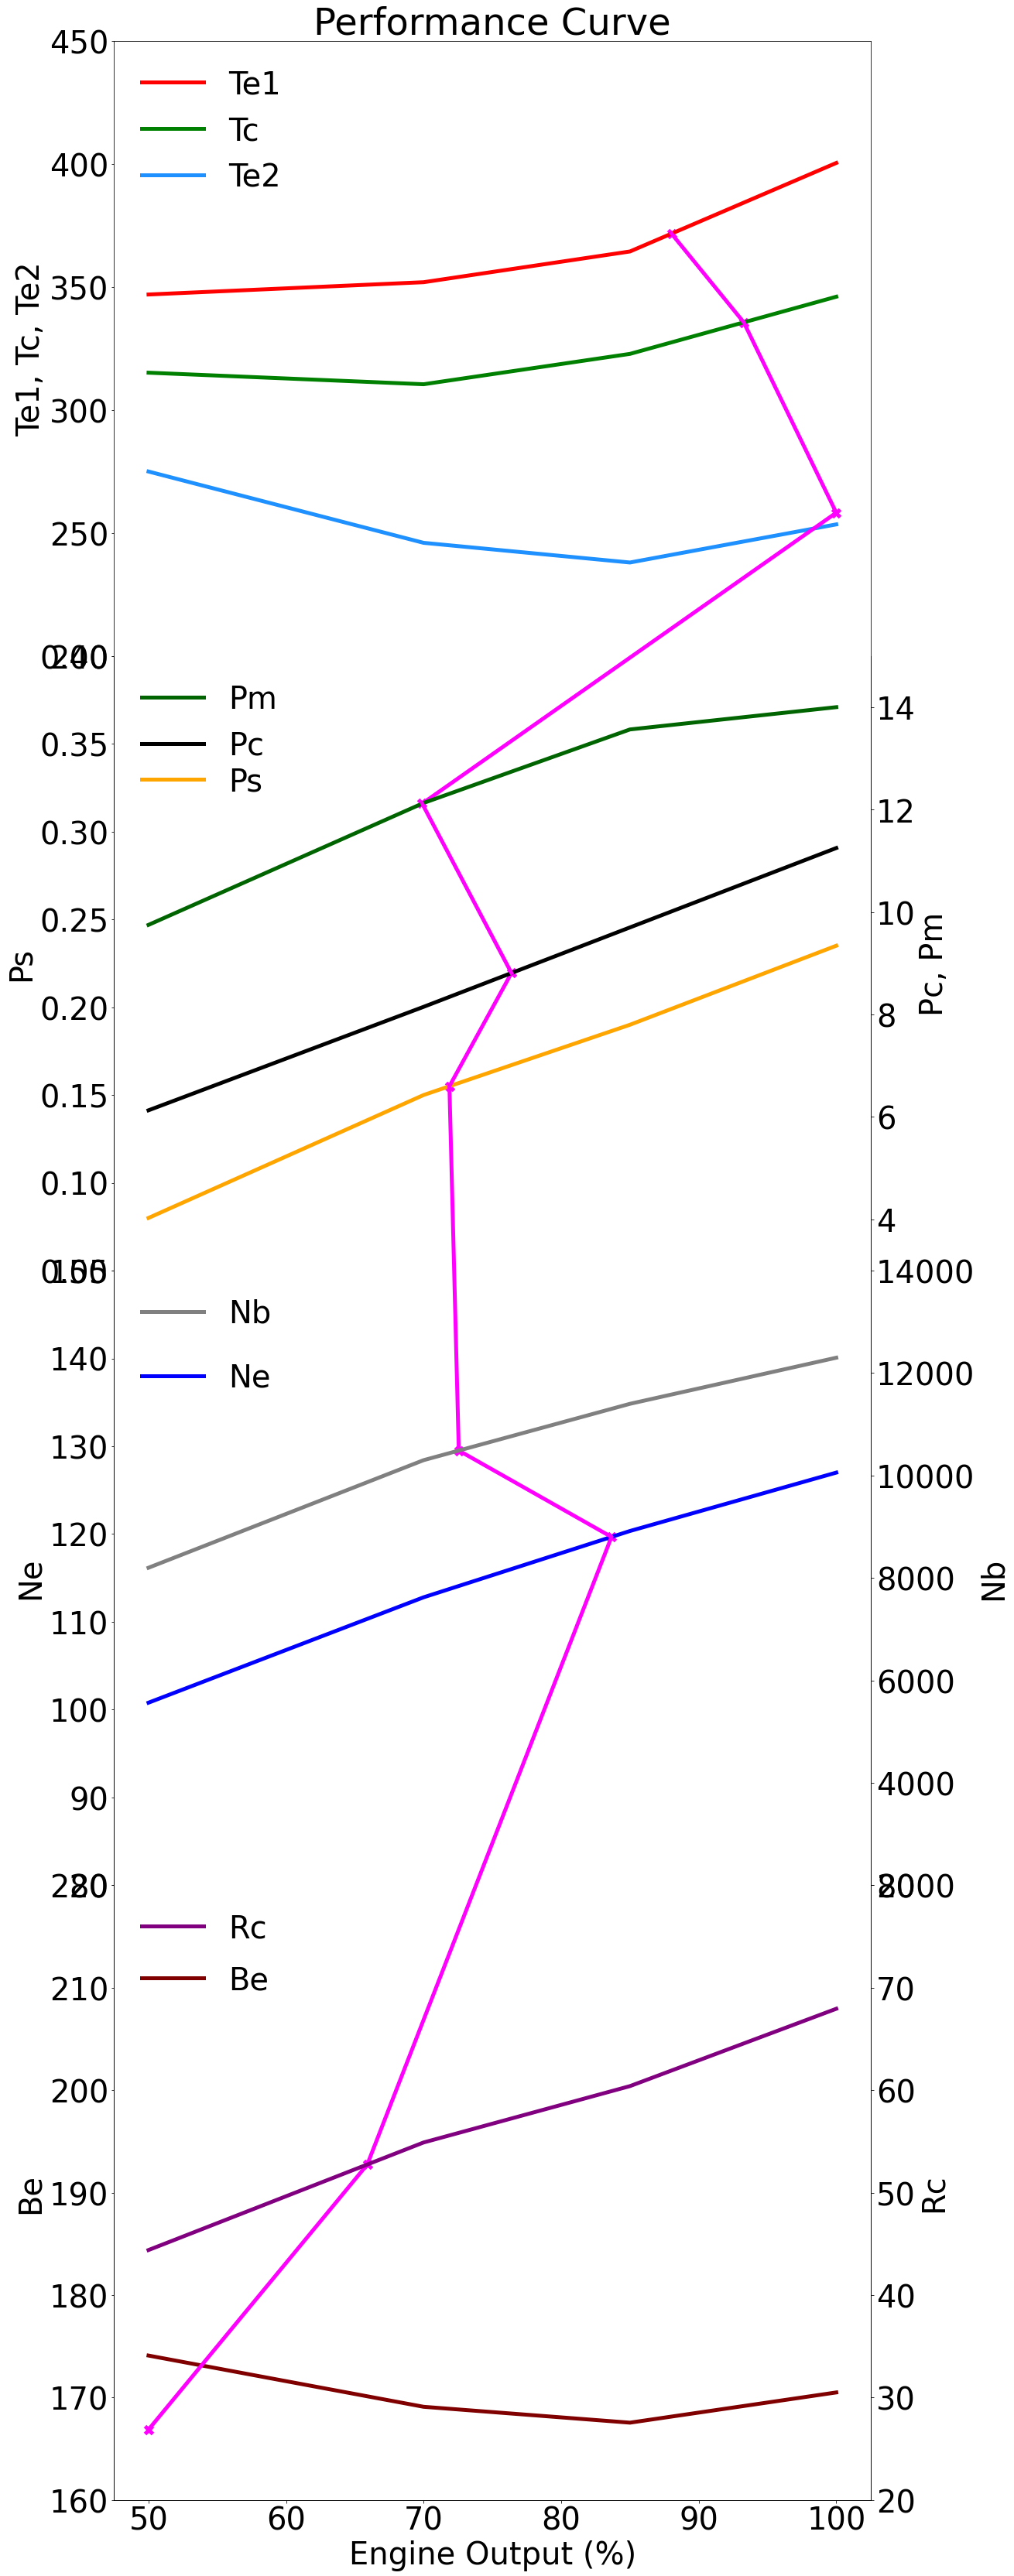

In [9]:
fig, ax = plt.subplots(4, 1, figsize=(15,45), gridspec_kw=dict(hspace=0))
fig.tight_layout(pad=0)

ax1t = ax[1].twinx()
ax2t = ax[2].twinx()
ax3t = ax[3].twinx()
ax_t = {1 : (1, ax1t), 2 : (2, ax2t), 3: (3, ax3t)}

ax[0].set_title('Performance Curve')
ax[3].set_xlabel('Engine Output (%)')

temp_func()

# ==================== Find Intersection
x_Te1 = np.interp(Te1, df['Te1'], df['Engine Output (%)'])
x_Tc = np.interp(Tc, df['Tc'], df['Engine Output (%)'])
x_Te2 = np.interp(Te2, df['Te2'], df['Engine Output (%)'])
x_Ps = np.interp(Ps, df['Ps'], df['Engine Output (%)'])
x_Pm = np.interp(Pm, df['Pm'], df['Engine Output (%)'])
x_Pc = np.interp(Pc, df['Pc'], df['Engine Output (%)'])
x_Ne = np.interp(Ne, df['Ne'], df['Engine Output (%)'])
x_Nb = np.interp(Nb, df['Nb'], df['Engine Output (%)'])
x_Be = np.interp(Be, df['Be'], df['Engine Output (%)'])
x_Rc = np.interp(Rc, df['Rc'], df['Engine Output (%)'])

# ==================== Create Dots
ax[0].scatter(x_Te1, Te1, 
              marker='x', 
              c = connector_color, 
              s = marker_size,
              linewidths = lwidth)
ax[0].scatter(x_Tc, Tc, 
              marker='x', 
              c = connector_color, 
              s = marker_size,
              linewidths = lwidth)
ax[0].scatter(x_Te2, Te2, 
              marker='x', 
              c = connector_color, 
              s = marker_size,
              linewidths = lwidth)
ax[0].plot([x_Te1, x_Tc, x_Te2], [Te1, Tc, Te2], 
           linewidth = lwidth, 
           color = connector_color)


ax[1].scatter(x_Ps, Ps, 
              marker='x', 
              c = connector_color, 
              s = marker_size,
              linewidths = lwidth)
ax1t.scatter(x_Pc, Pc, 
             marker='x', 
             c = connector_color, 
             s = marker_size,
             linewidths = lwidth)
ax1t.scatter(x_Pm, Pm, 
             marker='x', 
             c = connector_color, 
             s = marker_size,
             linewidths = lwidth)
ax1t.plot([x_Pm, x_Pc], [Pm, Pc], 
          linewidth = lwidth,
          color = connector_color)

con11 = ConnectionPatch(xyA=(x_Pc, Pc), 
                        xyB=(x_Ps, Ps), 
                        coordsA="data", 
                        coordsB="data", 
                        axesA = ax1t, 
                        axesB = ax[1], 
                        linewidth = lwidth,
                        color = connector_color )
con01 = ConnectionPatch(xyA=(x_Te2, Te2), 
                        xyB=(x_Pm, Pm), 
                        coordsA="data", 
                        coordsB="data", 
                        axesA=ax[0], 
                        axesB=ax1t, 
                        linewidth = lwidth,
                        color="magenta")
ax1t.add_artist(con01)
ax1t.add_artist(con11)

# Ps ke Nb
con12 = ConnectionPatch(xyA=(x_Ps, Ps), 
                        xyB=(x_Nb, Nb), 
                        coordsA="data", 
                        coordsB="data", 
                        axesA = ax[1], 
                        axesB = ax2t, 
                        linewidth = lwidth,
                        color = connector_color )
ax1t.add_artist(con12)

ax[2].scatter(x_Ne, Ne, 
              marker='x', 
              c = connector_color, 
              s = marker_size,
              linewidths = lwidth)
ax2t.scatter(x_Nb, Nb, 
             marker='x', 
             c = connector_color, 
             s = marker_size,
             linewidths = lwidth)
# Nb ke Ne
con22 = ConnectionPatch(xyA=(x_Nb, Nb), 
                        xyB=(x_Ne, Ne), 
                        coordsA="data", 
                        coordsB="data", 
                        axesA = ax2t, 
                        axesB = ax[2], 
                        linewidth = lwidth,
                        color = connector_color )
ax1t.add_artist(con22)

ax[3].scatter(x_Be, Be, 
              marker='x', 
              c = connector_color, 
              s = marker_size,
              linewidths = lwidth)
ax3t.scatter(x_Rc, Rc, 
             marker='x', 
             c = connector_color, 
             s = marker_size,
             linewidths = lwidth)
# Ne ke Rc
con23 = ConnectionPatch(xyA=(x_Ne, Ne), 
                        xyB=(x_Rc, Rc), 
                        coordsA="data", 
                        coordsB="data", 
                        axesA = ax[2], 
                        axesB = ax3t, 
                        linewidth = lwidth,
                        color = connector_color )
ax1t.add_artist(con23)

#Rc ke Be
con33 = ConnectionPatch(xyA=(x_Rc, Rc), 
                        xyB=(x_Be, Be), 
                        coordsA="data", 
                        coordsB="data", 
                        axesA = ax3t, 
                        axesB = ax[3], 
                        linewidth = lwidth,
                        color = connector_color )
ax1t.add_artist(con33)


plt.show()

In [8]:
# fig.savefig('result.png', bbox_inches="tight")